
# Introduction
```
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data
The columns are as follows
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

```




In the California housing dataset, the types of features can be categorized as follows:
```
In the California housing dataset, the types of features can be categorized as follows:

Nominal Features: These are categorical features without any inherent order or ranking.
ocean_proximity: This feature indicates the proximity of the housing unit to the ocean. It could be categorical, such as "near bay," "inland," "<1H OCEAN," etc.

Discrete Features: These are numeric features that can take only specific, distinct values.
housing_median_age: This feature represents the median age of housing units in a blcok. It's a discrete numeric value.
total_bedrooms: This feature represents the total number of bedrooms in a block. It's a discrete numeric value.
population: This feature represents the population of a block. It's a discrete numeric value.
households: This feature represents the total number of households within a home unit, for a block. It's a discrete numeric value.
total_rooms: This feature, which represents the total number of rooms in a housing unit, is a discrete numeric value.
median_house_value: This feature represents the median value of owner-occupied housing units in a block, in the context of the provided values, this is a discrete feature

Continuous Features: These are numeric features that can take any real value within a certain range.
longitude: This feature represents the longitude coordinate of a housing unit's location. It's a continuous numeric value.
latitude: This feature represents the latitude coordinate of a housing unit's location. It's a continuous numeric value.
median_income: This feature represents the median income of households in a block. It's a continuous numeric value.

```



In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "/kaggle/input/california-housing/housing(1).xlsx"
df = pd.read_excel(file_path)
# df.info()
# #df.describe()
# df.head()

1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [3]:
# Average of median_income column
average_median_income = df['median_income'].mean()
print("average median income ",average_median_income)

average median income  3.8706710029069766


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


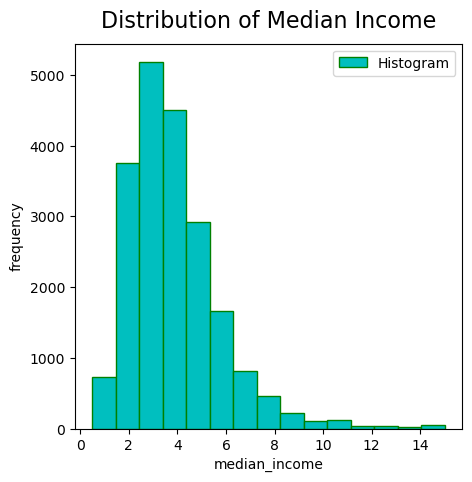

In [5]:
# Create a histogram- median_income It's a continuous numeric value.
plt.figure(figsize=(5,5))
# kde=True smoothed estimate of the data's underlying probability density function.
#sns.histplot(data=df, x='median_income', bins=30, kde=True, color='c', edgecolor='green')
plt.hist(x=df['median_income'],bins=15,edgecolor='green',facecolor='c', label='Histogram')

plt.title("Distribution of Median Income", y=1.02, fontsize=16, ha='center')
plt.xlabel("median_income")
plt.ylabel("frequency")
plt.legend()
plt.show()
# From the below plot could see High Frequency between 3 and 4 Median Income Values
# This range could be considered a common income level within the area represented by the dataset.
# and is slightly right skewed - could indicate income inequality, with a larger number of households having lower incomes.
# "median_income" can be an important feature in various data analyses, such as assessing the affordability of
# housing, understanding socioeconomic trends,and predicting housing prices based on income levels.


In [6]:
a = df['median_income'].mean() - df['median_income'].median()
skewness= a/df['median_income'].std()
print('skewness:',skewness)

skewness: 0.17679080080747497


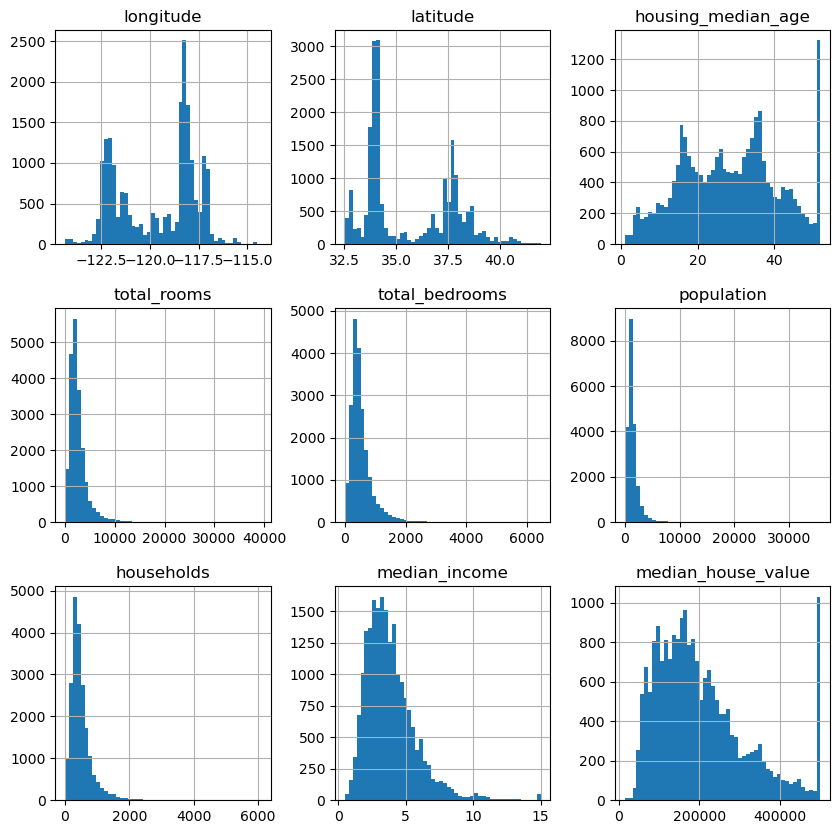

In [7]:
df.hist(bins=50,figsize=(10,10)) ##Histogram is used to see the distribution of a numerical value
plt.show()

2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

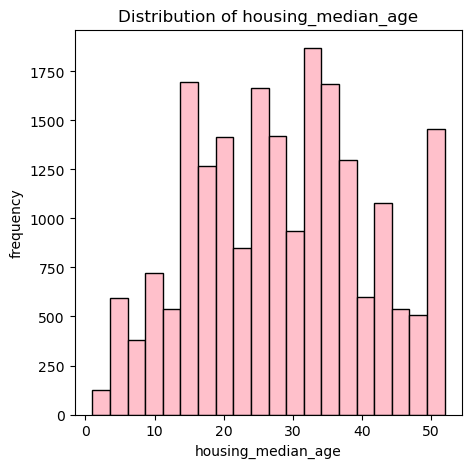

In [8]:
# Create a histogram- housing_median_age a discrete numeric value
# Histogram is used to see the distribution of a numerical value.
plt.figure(figsize=(5,5))
plt.hist(x=df['housing_median_age'],bins=20, facecolor='pink',edgecolor='black')
#sns.histplot(data=df, x='housing_median_age', bins=20, kde=True, color='blue',edgecolor='black')
plt.xlabel('housing_median_age')
plt.ylabel('frequency')
plt.title('Distribution of housing_median_age')
plt.show()
# From below plot could see between 30 to 40 housing_median_age having high frequency of distribution
# this looks like common age range and it's possible that there was a period during which a significant number of housing units were built, leading to a peak in the distribution.


3. Show with the help of visualization, how median_income and median_house_values are related?

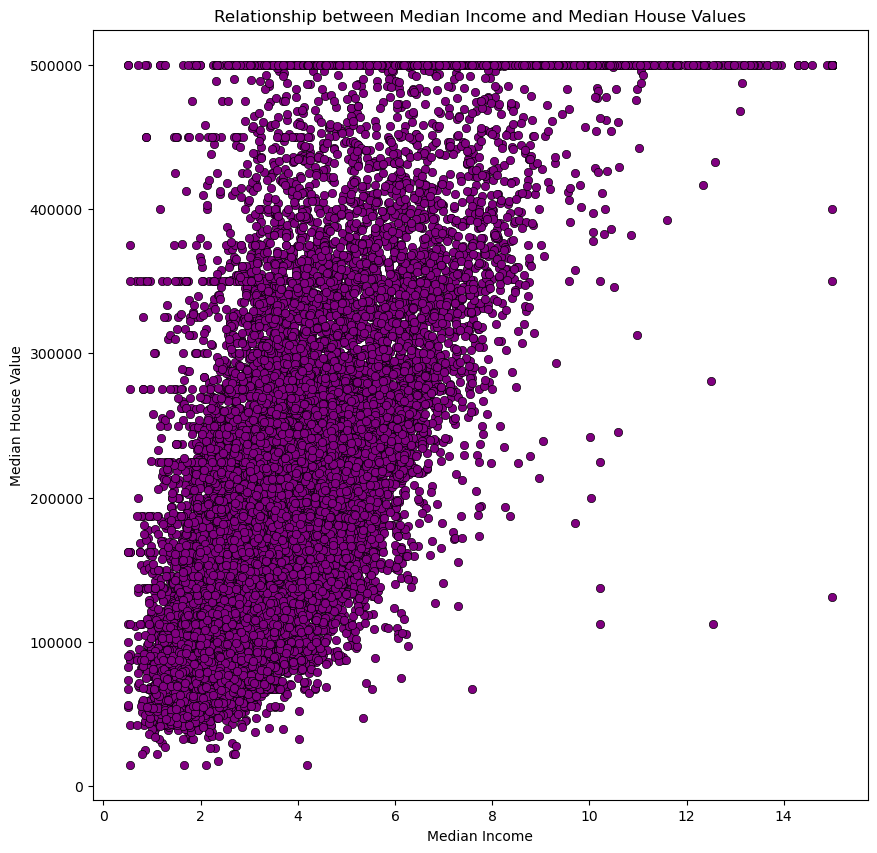

In [9]:
#Scatter plot gives a relation between two numerical values
plt.figure(figsize=(10,10))
sns.scatterplot(data = df, x ='median_income', y ='median_house_value', facecolor='purple', edgecolor='black')
plt.title("Relationship between Median Income and Median House Values")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

# From the above visualisation it is to be analysed that with an increase in the median_house_value there is
# also an increase in the median income.While,an outlier is present in median_house_value which is shown in the fig.
# Therefore,median_house_value is directly proportional to median income.

4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [10]:
# Create a new dataset by removing rows where "total_bedrooms" is NaN - new_df
# df[df.isnull().any(axis=1)]
new_df = df.dropna(subset=["total_bedrooms"]).copy()  #copy() function is used to create a new copy of the DataFrame to avoid modifying the original DataFrame.
# Remove rows with missing values from the current DataFrame (df)
# df.dropna(subset=['total_bedrooms'], inplace=True)
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [11]:
missing_values = new_df.isnull().sum()
missing_values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [12]:
#finding mean of column total_bedrooms
mean_total_bedrooms = df['total_bedrooms'].mean()
#creating copy of data set into new_copy data set which will have mean value in null place of total_bedrooms column
new_copy = df.copy()
#filling the missing data with the mean value of the total_bedrooms
new_copy['total_bedrooms'].fillna(mean_total_bedrooms,inplace=True)
print("mean of total_bedrooms:",mean_total_bedrooms)
new_copy[new_copy['total_bedrooms']==mean_total_bedrooms]
#print(new_copy.head())

mean of total_bedrooms: 537.8705525375618


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,537.870553,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,537.870553,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,537.870553,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,537.870553,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,537.870553,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,537.870553,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,537.870553,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,537.870553,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,537.870553,2734,814,6.6073,258100,<1H OCEAN


6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [13]:
def calculate_median(df,column_name):
  median = df[column_name].median()
  return median

median_longitude	= calculate_median(df,'longitude')
print("median of longitude:",median_longitude)
median_latitude	= calculate_median(df,'latitude')
print("median of latitude:",median_latitude)
median_housing_median_age = calculate_median(df,'housing_median_age')
print("median of housing_median_age:",median_housing_median_age)
median_total_rooms	= calculate_median(df,'total_rooms')
print("median of total_rooms:",median_total_rooms)
median_total_bedrooms = calculate_median(df,'total_bedrooms')
print("median of total_bedrooms:",median_total_bedrooms)
median_population	= calculate_median(df,'population')
print("median of population:",median_population)
median_households = calculate_median(df,'households')
print("median of households:",median_households)
median_median_income = calculate_median(df,'median_income')
print("median of median_income:",median_median_income)
median_median_house_value = calculate_median(df,'median_house_value')
print("median of median_house_value:",median_median_house_value)

median of longitude: -118.49
median of latitude: 34.26
median of housing_median_age: 29.0
median of total_rooms: 2127.0
median of total_bedrooms: 435.0
median of population: 1166.0
median of households: 409.0
median of median_income: 3.5347999999999997
median of median_house_value: 179700.0


In [14]:
# List of numerical columns
numerical_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'median_house_value'
]

# Calculate and print the median for each numerical column
for column in numerical_columns:
    median_value = df[column].median()
    print(f"Median of {column}: {round(median_value,2)}")

Median of longitude: -118.49
Median of latitude: 34.26
Median of housing_median_age: 29.0
Median of total_rooms: 2127.0
Median of total_bedrooms: 435.0
Median of population: 1166.0
Median of households: 409.0
Median of median_income: 3.53
Median of median_house_value: 179700.0


7. Plot latitude versus longitude and explain your observations.

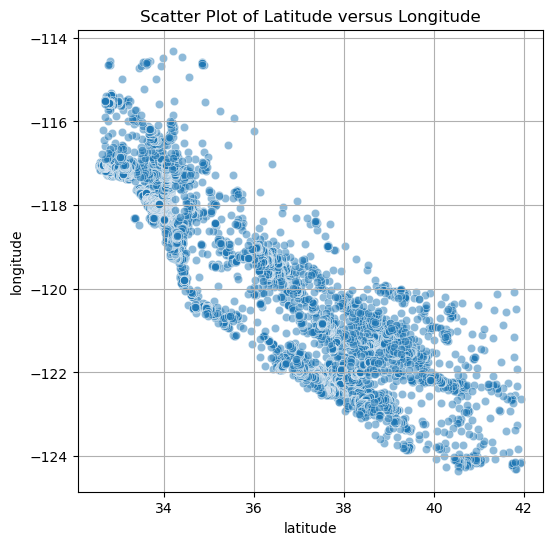

In [15]:
#Scatter plot gives a relationship between two numerical values.
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='latitude' , y='longitude',alpha=0.5) #alpha = 1: no transparency-data points are completely visible,alpha = 0: Fully transparent-data points are not visible at all. alpha to a value between 0 and 1 allows you to control the level of transparency of the data points.
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title("Scatter Plot of Latitude versus Longitude")
plt.grid(True)
plt.show()
# With an decrease in longitude,latitude is increased.
#From this we can say that longitude is inversely proportional to latitude.
# From the above plot it is to be noted that latitude vs longitude has negative correlation as here y-axis
# is increasing while x-axis is decreasing- both are moving in an opposite direction.

8.Create a data set for which the ocean_proximity is ‘Near ocean’.

In [16]:
df_ocean_proximity = df[df['ocean_proximity']=='NEAR OCEAN']
df_ocean_proximity.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN


9. Find the mean and median of the median income for the data set created in question 8.



In [17]:
# mean and median of data set where ocean_proximity is 'NEAR_OCEAN' - df_ocean_proximity
mean = df_ocean_proximity['median_income'].mean()
median = df_ocean_proximity['median_income'].median()
print('Mean of median_income in df_ocean_proximity :',mean)
print('Median of median_income in df_ocean_proximity:',median)

Mean of median_income in df_ocean_proximity : 4.0057848006019565
Median of median_income in df_ocean_proximity: 3.64705


10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [18]:
def determine_size(total_bedrooms):
    if total_bedrooms <= 10:
        return 'small'
    elif 11 <= total_bedrooms < 1000:
        return 'medium'
    else:
        return 'large'

# create the new column
df['total_bedroom_size'] = df['total_bedrooms'].apply(determine_size)

# Print the first few rows of the updated DataFrame
print(df.head())
# print(df[df['total_bedroom_size']=='small'].head(2))
# print(df[df['total_bedroom_size']=='medium'].head(2))
# print(df[df['total_bedroom_size']=='large'].head(2))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   

  total_bedroom_size  
0             medium  
1              large  

CONCLUSION:

1.From the given dataset it is to be noted that the outliers are present for housing_median_age and median_house_value.

2.All the features present in this dataset are of float type except ocean_proximity which is of object datatype,

3.housing_median_age is of fairly symmetric as the skewness value (-0.5 to -0.1).

4.plot between median_income vs median_house_values is directly proportional to each other as it has positive correlation.

5.plot between latitude and longitude is inversely proportional to each other as within increase in latitude,there is decrease in longitude.Therefore ,it has a negative correlation.